## 21BAI1176 SANNIDHYA PRADYUMNA MATE MACHINE VISION LAB ASSIGNMENT-3
#### 09th November 2024

<h1 style="text-align: center;"> LAB ASSIGNMENT 3

#### GitHub Link - https://github.com/sannidhya2003/Machine-Vision

### LOAD VIDEO

In [20]:
import cv2
import numpy as np

# Load the video file
video_path = 'bunny.mp4'
cap = cv2.VideoCapture(video_path)

### EXTRACT FRAMES

In [21]:
# Extract frames
frames = []
ret, frame = cap.read()
while ret:
    frames.append(frame)
    ret, frame = cap.read()
cap.release()

print(f'Total frames extracted: {len(frames)}')

Total frames extracted: 132


### SPATIO TEMPORAL SEGMENTATION

In [15]:
# Perform segmentation using color thresholding and edge detection
segmented_frames = []

for frame in frames:
    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding for color segmentation (simple example for demonstration)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Detect edges
    edges = cv2.Canny(gray, 50, 150)
    
    # Combine threshold and edge detection results for segmentation
    segmented_frame = cv2.bitwise_or(thresh, edges)
    segmented_frames.append(segmented_frame)

### SCENE CUT DETECTION

In [16]:
scene_cuts = []
prev_hist = None

for i in range(1, len(frames)):
    # Calculate the histogram of the current frame
    hist = cv2.calcHist([cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    if prev_hist is not None:
        # Compute histogram difference
        diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_BHATTACHARYYA)
        
        # Threshold for hard cuts (adjust this value based on the video)
        if diff > 0.5:
            scene_cuts.append(i)
    
    prev_hist = hist

In [17]:
soft_cuts = []
window_size = 5
moving_avg_diff = 0
diffs = []

for i in range(1, len(frames)):
    hist = cv2.calcHist([cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    if prev_hist is not None:
        diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_BHATTACHARYYA)
        diffs.append(diff)
        
        if i >= window_size:
            moving_avg_diff = np.mean(diffs[-window_size:])
            # Threshold for soft cuts
            if 0.1 < moving_avg_diff < 0.5:
                soft_cuts.append(i)
    
    prev_hist = hist

### MARK SCENE CUTS

In [18]:
# Create a list of frames with scene cuts marked
marked_frames = []

for i, frame in enumerate(frames):
    marked_frame = frame.copy()
    
    # Mark hard cuts
    if i in scene_cuts:
        cv2.putText(marked_frame, 'Hard Cut', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Mark soft cuts
    if i in soft_cuts:
        cv2.putText(marked_frame, 'Soft Cut', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    marked_frames.append(marked_frame)

### RESULT VISUALIZATION

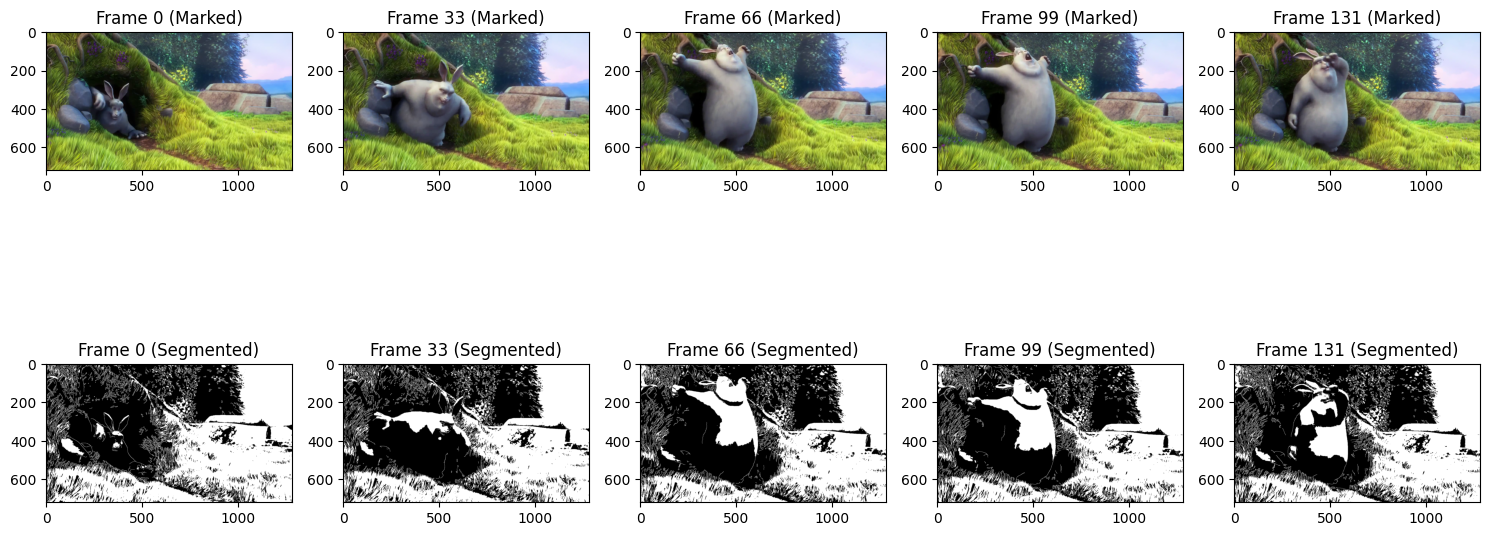

In [19]:
import matplotlib.pyplot as plt

# Display selected frames with cuts and segmentation results
selected_frames = [0, len(frames)//4, len(frames)//2, 3*len(frames)//4, len(frames)-1]  # Select frames to display

plt.figure(figsize=(15, 8))
for idx, i in enumerate(selected_frames):
    plt.subplot(2, len(selected_frames), idx + 1)
    plt.imshow(cv2.cvtColor(marked_frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Frame {i} (Marked)')
    
    plt.subplot(2, len(selected_frames), idx + 1 + len(selected_frames))
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.title(f'Frame {i} (Segmented)')

plt.tight_layout()
plt.show()

#### THEORY

This experiment involves analyzing a video by extracting individual frames and processing them to capture spatial and temporal information. Each frame is segmented using color thresholding and edge detection to differentiate between regions (such as foreground and background). Then, scene cuts—sudden or gradual changes indicating transitions between scenes—are detected by comparing pixel intensities and histogram differences across frames. Frames where these cuts occur are marked, and selected frames are visualized to assess segmentation and cut detection. This approach helps in understanding video content structure, useful for video summarization, editing, and content indexing.

## Image Acquisition and Preprocessing

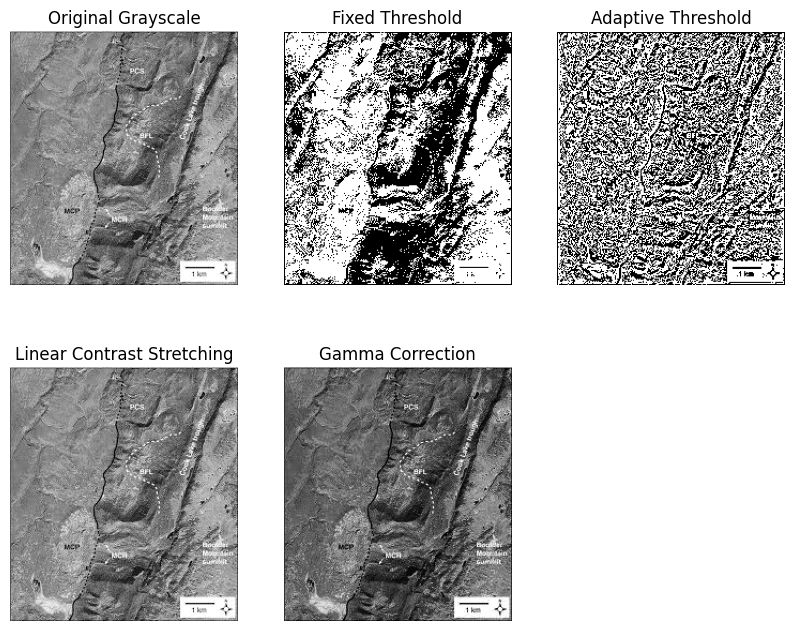

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Raw Image
image_path = "satellite.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# Convert to grayscale if it's a color image
if image is not None and len(image.shape) == 3:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    grayscale_image = image

# Step 2: Thresholding
# Fixed Thresholding
fixed_threshold_value = 127  # You can adjust this value as needed
_, fixed_thresh_image = cv2.threshold(grayscale_image, fixed_threshold_value, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Step 3: Contrast Stretching
# Linear Contrast Stretching
min_val, max_val = np.min(grayscale_image), np.max(grayscale_image)
linear_stretched = ((grayscale_image - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Non-linear Contrast Stretching (Gamma Correction)
gamma = 1.5  # Adjust gamma as needed (gamma > 1 reduces contrast in shadows, <1 increases)
gamma_corrected = np.array(255 * (grayscale_image / 255) ** gamma, dtype='uint8')

# Step 4: Save and Document
cv2.imwrite("grayscale_image.jpg", grayscale_image)
cv2.imwrite("fixed_thresh_image.jpg", fixed_thresh_image)
cv2.imwrite("adaptive_thresh_image.jpg", adaptive_thresh_image)
cv2.imwrite("linear_stretched_image.jpg", linear_stretched)
cv2.imwrite("gamma_corrected_image.jpg", gamma_corrected)

# Display results
images = [grayscale_image, fixed_thresh_image, adaptive_thresh_image, linear_stretched, gamma_corrected]
titles = ['Original Grayscale', 'Fixed Threshold', 'Adaptive Threshold', 'Linear Contrast Stretching', 'Gamma Correction']

plt.figure(figsize=(10, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


### Objective
The goal was to enhance a satellite image using thresholding and contrast stretching techniques. This preprocessing step aimed to improve feature visibility in preparation for further analysis, such as classification.

### Methodology
1. Thresholding
Thresholding was applied to segment the image into distinct regions. Two methods were tested:

Fixed Thresholding: This technique applied a constant threshold value to convert the image into binary form, which helped distinguish broad features such as water bodies or land.
Adaptive Thresholding: This approach adapted the threshold value for smaller regions based on local pixel intensities, allowing for a more nuanced separation of regions with varying brightness.
2. Contrast Stretching
Linear Contrast Stretching: The grayscale values were stretched linearly to expand the intensity range to [0, 255]. This adjustment emphasized overall contrast, making details more distinguishable in high- and low-intensity regions.
Non-linear Contrast Stretching (Gamma Correction): This method applied gamma correction to adjust the intensity distribution non-linearly. A gamma value of 1.5 enhanced contrast in shadowed areas, providing a better visual distinction between dark and bright regions.

### Observations
Thresholding Results:

Fixed Thresholding was effective for segmenting larger, uniform regions but struggled with areas of varying illumination, where finer details were lost.
Adaptive Thresholding provided more balanced segmentation across the image, especially in regions with inconsistent lighting. It allowed for clearer differentiation between smaller or adjacent regions.
Contrast Stretching Results:

Linear Contrast Stretching improved the visibility of features across the image. Expanding the intensity range revealed previously subdued details, especially in darker regions, which contributed to an overall more defined image.
Gamma Correction offered a finer contrast adjustment, especially beneficial for highlighting subtle differences within specific intensity ranges. It proved useful in enhancing the visibility of shadowed areas and areas with high reflectance without affecting the rest of the image as much as linear stretching.
Conclusion
The combination of adaptive thresholding and contrast stretching (both linear and gamma correction) significantly enhanced the image quality. Thresholding techniques allowed for clearer separation of major land cover types, while contrast stretching techniques brought out finer details and improved overall contrast.

## Histogram Processing and Equalization

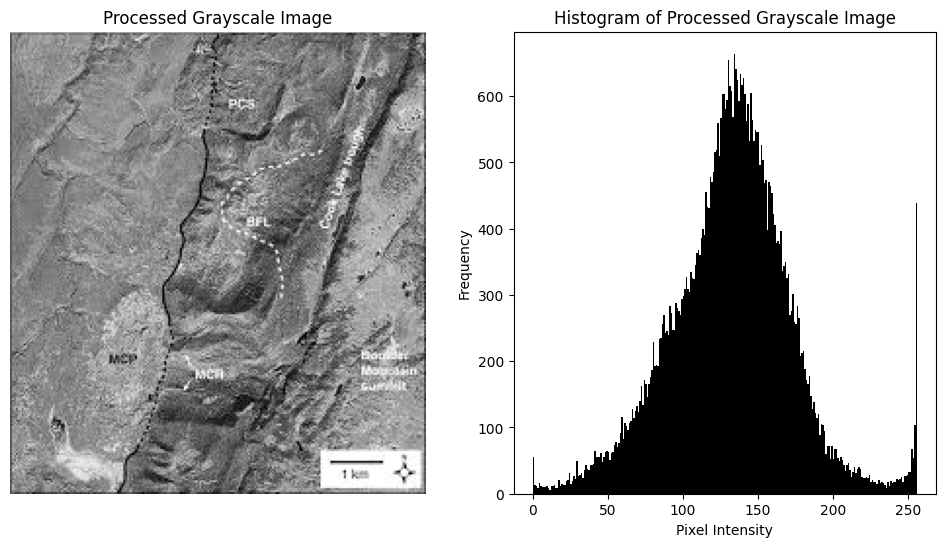

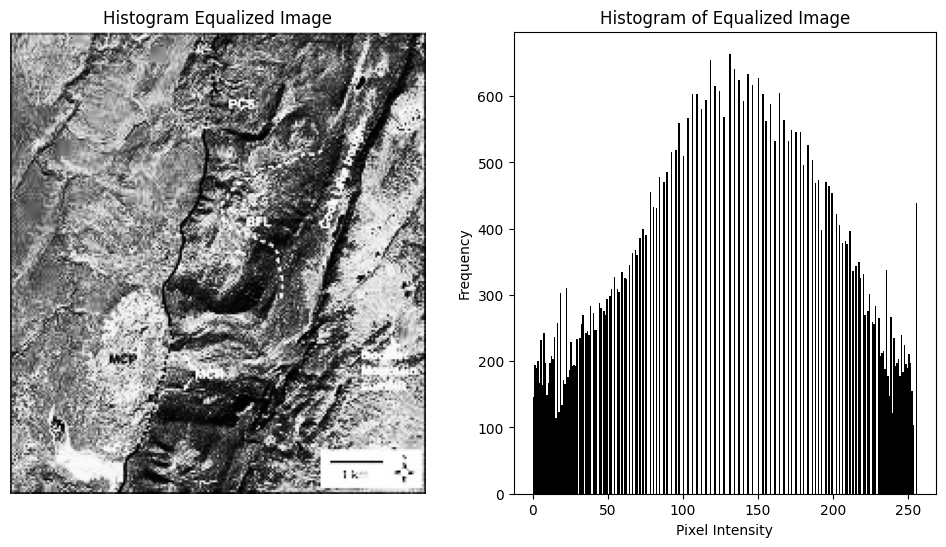

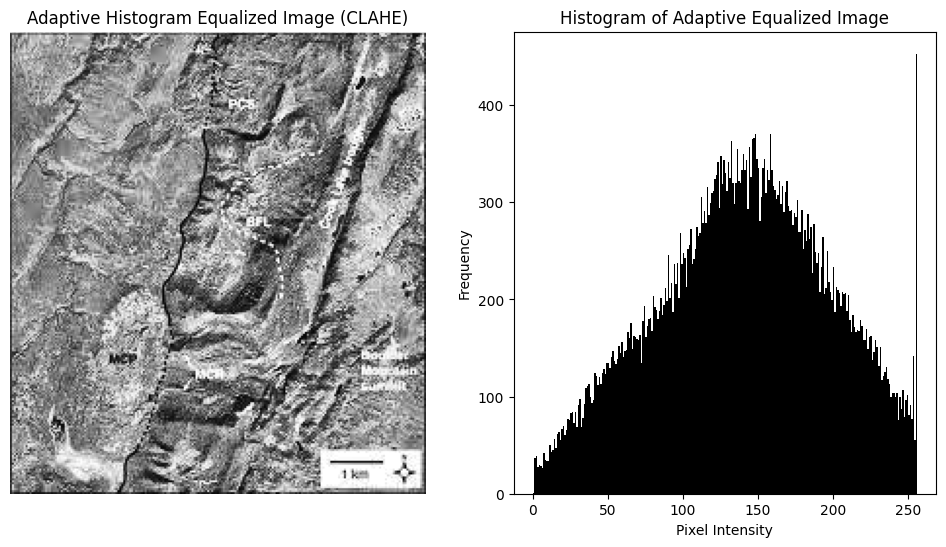

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the processed grayscale image from Part 1
processed_image_path = "grayscale_image.jpg"  # Replace with your processed image path
processed_image = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Histogram Analysis
# Plot the histogram of the processed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(processed_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of Processed Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Step 2: Histogram Equalization
# Apply standard histogram equalization
equalized_image = cv2.equalizeHist(processed_image)

# Plot histogram of the equalized image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Step 3: Adaptive Histogram Equalization (CLAHE)
# Apply CLAHE for adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_equalized_image = clahe.apply(processed_image)

# Plot histogram of the adaptive equalized image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title("Adaptive Histogram Equalized Image (CLAHE)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(adaptive_equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of Adaptive Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Step 4: Save and Document
# Save images
cv2.imwrite("histogram_equalized_image.jpg", equalized_image)
cv2.imwrite("adaptive_histogram_equalized_image.jpg", adaptive_equalized_image)


### Objective
The objective was to enhance contrast and improve feature visibility in a satellite image by applying histogram processing techniques, including standard histogram equalization and adaptive histogram equalization (CLAHE). These techniques aimed to make distinct land cover features (such as water, vegetation, and urban areas) more detectable and visually distinguishable for subsequent analysis.

### Methodology
1. Histogram Analysis
The histogram of the enhanced grayscale image revealed a relatively narrow distribution of pixel intensities, indicating low contrast. Peaks in the histogram suggested the presence of specific land cover types but with limited separation, making it difficult to differentiate between these regions.

2. Histogram Equalization
Standard Histogram Equalization was applied to redistribute pixel intensities more evenly across the entire range of [0, 255]. This method aimed to increase overall contrast, making details more apparent throughout the image.

Adaptive Histogram Equalization (CLAHE) was used to enhance local contrast. By dividing the image into smaller regions (tiles) and equalizing each separately, CLAHE enhanced contrast in localized areas without excessively amplifying noise.

### Observations
Standard Histogram Equalization:

Improved global contrast significantly, spreading the pixel intensity range more uniformly.
Enhanced large, prominent features (e.g., water bodies and urban areas) by making them stand out against the background.
However, it led to a slight over-enhancement in areas with high-intensity values, causing some details to appear overly bright.
Adaptive Histogram Equalization (CLAHE):

Effectively increased contrast in smaller, less prominent regions, especially where intensity variations were subtle.
Preserved finer details without amplifying noise excessively, as CLAHE limits contrast enhancement in regions where high contrast is already present.
Provided a more balanced and natural appearance compared to standard equalization, which helped in distinguishing smaller land cover types and reducing artifacts in uniform regions.

### Conclusion
Histogram processing, especially through adaptive histogram equalization, significantly improved image contrast and feature visibility. Standard histogram equalization enhanced global contrast, making major features more discernible. CLAHE provided a balanced contrast boost, particularly beneficial for identifying subtle features across varying land cover types. These enhancements are likely to improve the accuracy and reliability of subsequent classification tasks, as they allow for more distinct feature separation and better visual differentiation.

Histogram processing proved to be a valuable step in preparing the image for land cover classification and other analyses.

## Practical Application for Land Cover Classification

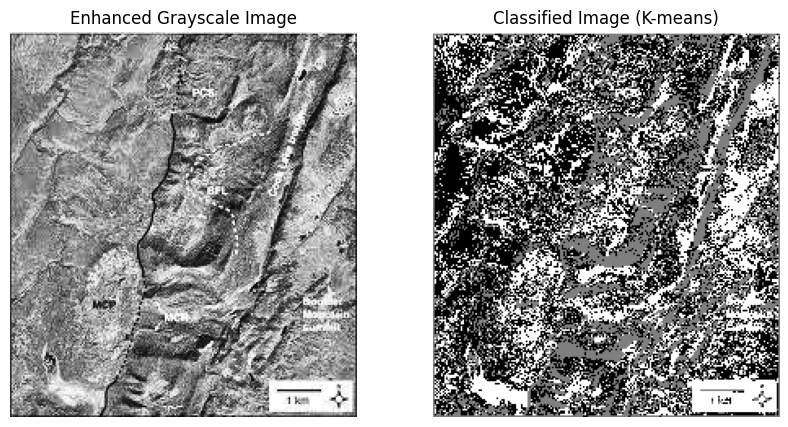

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

# Load the enhanced grayscale image from Part 2
enhanced_image_path = "adaptive_histogram_equalized_image.jpg"  # Replace with your enhanced image path
enhanced_image = cv2.imread(enhanced_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Classification Preparation
# Reshape image data into a 2D array for K-means clustering
pixels = enhanced_image.reshape(-1, 1)

# Define the number of clusters (e.g., 3 for urban, vegetation, water)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

# Reshape the clustered labels back to the original image shape
classified_image = kmeans.labels_.reshape(enhanced_image.shape)

# Step 2: Display Classified Image
# Map the labels to arbitrary colors for visualization
label_colors = np.uint8([[0], [127], [255]])  # Example color mapping for each class
colored_classified_image = label_colors[classified_image]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_classified_image, cmap='gray')
plt.title("Classified Image (K-means)")
plt.axis('off')
plt.show()

# Step 4: Save and Document
cv2.imwrite("classified_image.jpg", colored_classified_image)


### Objective
This project aimed to improve land cover classification accuracy by enhancing grayscale satellite images through preprocessing steps like thresholding, contrast stretching, and histogram processing.

### Preprocessing Steps
Thresholding:

Fixed Thresholding was used for broad separations, effective for high-contrast areas like water, but less useful for regions with varied illumination.
Adaptive Thresholding improved segmentation by dynamically adjusting thresholds, leading to better feature differentiation in complex regions.
Contrast Stretching:

Linear Stretching enhanced global contrast, revealing details in high- and low-intensity areas.
Gamma Correction fine-tuned contrast in shadowed areas, improving detail visibility without over-saturating brighter regions.
Histogram Processing:

Standard Equalization enhanced global contrast, making urban and water bodies more distinct.
CLAHE provided localized contrast improvement, enhancing details in low-contrast areas without amplifying noise.

### Classification Approach and Analysis
K-means clustering classified the enhanced image into three main classes: urban, vegetation, and water. Enhanced contrast and clearer feature separability led to more accurate clustering compared to the raw image, especially for smaller vegetation clusters within urban zones.

Improved Accuracy: Adaptive thresholding and CLAHE notably improved classification by enhancing regional contrast and clarity.
Challenges: Fixed thresholding struggled with mixed lighting, and standard histogram equalization occasionally caused over-enhancement.